In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os

In [23]:
data = pd.read_csv("data.csv",header=None)
data = data.sample(frac=1)
data = data.reset_index(drop=True)
labels = data[0]
data = data.drop(0,axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.asarray(y_train.values.tolist())
y_train = y_train.reshape(-1,1)
y_test = np.asarray(y_test.values.tolist())
y_test = y_test.reshape(-1,1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 2040)
(45, 2040)
(102, 1)
(45, 1)


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
def displayStats(model,modelname: str,test: np.ndarray,truth: np.ndarray):
    predictions = model.predict(test) #all of them should have this
    predictions = np.around(predictions)
    # print(predictions)
    print(modelname+" STATS:")
    print("ACCURACY: "+str(accuracy_score(truth,predictions)))

   #not all models have predict_proba
    if callable(getattr(model, "predict_proba", None)):
        soft_predictions = model.predict_proba(test)[:,1]
        print("ROC AUC: "+str(roc_auc_score(truth,soft_predictions)))
    
    cmat = confusion_matrix(truth,predictions)
    disp = ConfusionMatrixDisplay(cmat)
    disp.plot()
    plt.show()

# Training a very simple keras neural net to act as a baseline
---

In [7]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [45]:
from keras import Sequential
from keras.layers import Activation, Dense
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu')) 
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(X_train,y_train)

ValueError: in user code:

    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/metrics/__init__.py", line 181, in get
        return deserialize(str(identifier))
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/metrics/__init__.py", line 136, in deserialize
        return deserialize_keras_object(
    File "/home/sidharth/Documents/School/2022_2023/EE379K_ComputerVision/final_proj/Shot-Predictor/.venv/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: roc-auc. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


2/2 [==============================] - 0s 4ms/step
Keras NN STATS:
ACCURACY: 0.4888888888888889


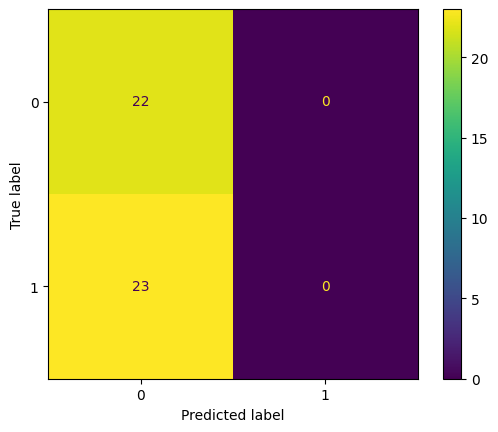

In [44]:
displayStats(model, "Keras NN", X_test, y_test)